# Differences in redox and buffer models
- This notebook emphases the difference in QFM buffer positions and redox models for calculating Fe3/FeT from buffer positions

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PySulfSat as ss
pd.options.display.max_columns = None

## Lets look at the difference between the position of the QFM buffer in logfo2 space for 3 options

## Frost equation

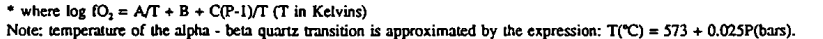

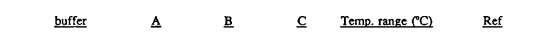

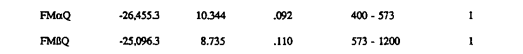

## ONeill 
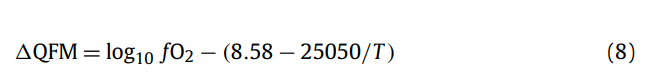

## Petrolog3


 - Lets do comparisons at 1050 Celcius, 200 MPa (2 kbar)
 - Lets start with ONeill Delta QFM=0, and see what that logfo2 gets us in other models

In [38]:
T_K=273.15+1050
deltaQFM_ONeill=1
log_fo2_Oneill=deltaQFM_ONeill+8.58 -25050/T_K
log_fo2_Oneill

-9.352093866908513

In [39]:
Diff_Buffers_200MPa=ss.calculate_fo2_QFM_buffers(logfo2=log_fo2_Oneill, T_K=1050+273.15, P_kbar=200/100)
Diff_Buffers_200MPa

,logfo2_QFM_ONeill,logfo2_QFM_Frost,logfo2_QFM_Petrolog3,DeltaQFM_ONeill,DeltaQFM_Frost,DeltaQFM_Petrolog3
0,-10.352094,-10.065899,-10.182584,1.0,0.713806,0.83049


### Lets calculate Jugo using these

In [40]:
Jugo_Oneill=ss.calculate_S6St_Jugo2010_eq10(deltaQFM=Diff_Buffers_200MPa['DeltaQFM_ONeill'])
print('Jugo ONeill')
print(Jugo_Oneill)

# Frost
Jugo_Frost=ss.calculate_S6St_Jugo2010_eq10(deltaQFM=Diff_Buffers_200MPa['DeltaQFM_Frost'])
print('Jugo Frost')
print(Jugo_Frost)

# Petrolog
Jugo_Pet=ss.calculate_S6St_Jugo2010_eq10(deltaQFM=Diff_Buffers_200MPa['DeltaQFM_Petrolog3'])
print('Jugo Pet')
print(Jugo_Pet)

Jugo ONeill
0    0.442688
Name: DeltaQFM_ONeill, dtype: float64
Jugo Frost
0    0.175342
Name: DeltaQFM_Frost, dtype: float64
Jugo Pet
0    0.266808
Name: DeltaQFM_Petrolog3, dtype: float64


In [ ]:
## Different redox models in petrolog


In [50]:
Borisov=ss.calculate_S6St_Nash2019(T_K=1248.5+273.15, Fe3Fet_Liq=0.097)
100*Borisov

1.220933176946195

In [51]:
Kress=ss.calculate_S6St_Nash2019(T_K=1246.6+273.15, Fe3Fet_Liq=0.139)
100*Kress

23.779681032567655

In [52]:
Kilinic=ss.calculate_S6St_Nash2019(T_K=1247.1+273.15, Fe3Fet_Liq=0.13)
100*Kilinic

14.486830659255261

In [53]:
Sack=ss.calculate_S6St_Nash2019(T_K=1247.4+273.15, Fe3Fet_Liq=0.122)
100*Sack

8.691302059625647